# Zomato EDA

In [285]:
# Importing the Libraries
# https://pandas.pydata.org/docs/
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [286]:
df = pd.read_csv("C:\\Users\\harip\\Desktop\\Projects\\data\\Zomatodataset\\zomato.csv",encoding='latin-1')
# have some uni-code issue / encoding formate , latin-1 is used for encoding issue

In [287]:
df.head(2)
# Imported and Checking 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [288]:
# Checking all the col
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [289]:
# Checking the rows and column
df.shape

(9551, 21)

In [290]:
# One more way of understanding data
df.info()
# Object -> Categorical or Numerical
# int64 -> Numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [291]:
# Help you find all the statistical values, They take only the integer features 
round(df.describe(),2)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00
mean,9051128.35,18.37,64.13,25.85,1199.21,1.80,2.67,156.91
std,8791521.28,56.75,41.47,11.01,16121.18,0.91,1.52,430.17
min,53.00,1.00,-157.95,-41.33,0.00,1.00,0.00,0.00
25%,301962.50,1.00,77.08,28.48,250.00,1.00,2.50,5.00
50%,6004089.00,1.00,77.19,28.57,400.00,2.00,3.20,31.00
75%,18352291.50,1.00,77.28,28.64,700.00,2.00,3.70,131.00
max,18500652.00,216.00,174.83,55.98,800000.00,4.00,4.90,10934.00


*   BASICS ANALYSIS STEPS
1. FIND MISSING VALUES 
2. EXPLORE NUMERICAL AND CATEGORICAL VALUE
3. FIND THE CORELATION 

In [292]:
# Find the Missing / Null Value
df.isnull().sum()
# found 9 missing values in cosine

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [293]:
# In another way we can use is
[each_col for each_col in df.columns if df[each_col].isnull().sum()>0]
# Basically defines for each col in every col in data if it has null value > 0 return

['Cuisines']

<Axes: >

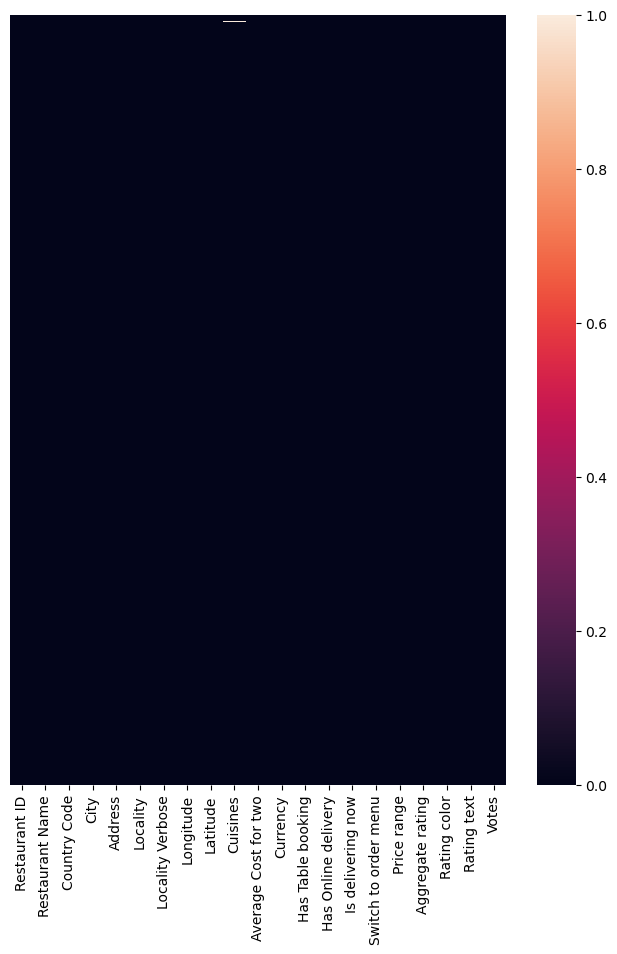

In [294]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [295]:
df_country = pd.read_excel('C:\\Users\\harip\\Desktop\\Projects\\data\\Zomatodataset\\Country-Code.xlsx')
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [296]:
df['Country Code'].head(3)

0    162
1    162
2    162
Name: Country Code, dtype: int64

In [297]:
# Here we are combing two data-frames on the county code by using merge() , more time you run more col gets added 
df = pd.merge(df,df_country,on='Country Code',how='left')
# here on merge(dataset you want to add data, data set from which you want data, what data you need to merge, how = which dataset to take)
# here we are basically merging the county assigned to code with the country

In [298]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [299]:
# To check the datatypes
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [300]:
# To check how many different countries zomato operates
df.Country.value_counts() # you get values + Frequency of occurance
country_name = df.Country.value_counts().index

1. From above observation we can tell Zomato operated more in INDIA
* SO MAX transactions are happening in INDIA

Getting only the values from the value_counts()

In [301]:
county_value = df.Country.value_counts().values

In [302]:
# If i want only the country names
df.Country.value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

1. Zomato has largest transaction in INDIA, major business is happenig in india
2. Then USA and then UK

[]

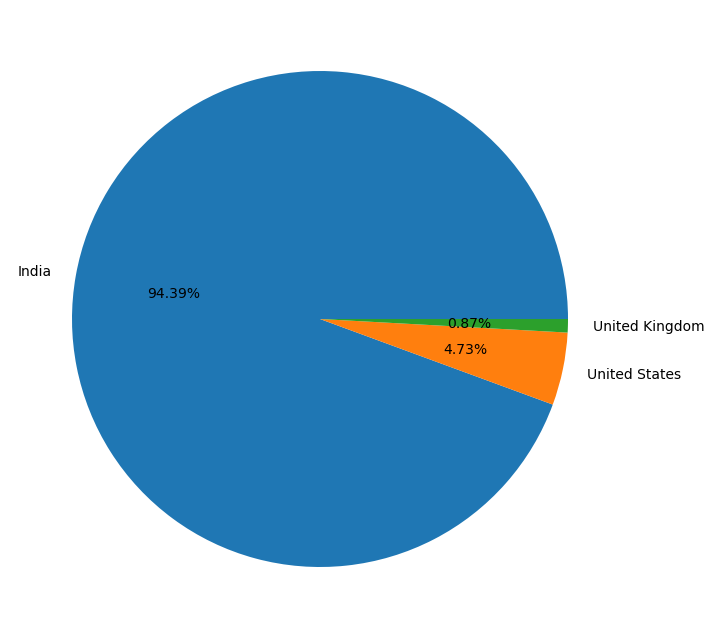

In [303]:
plt.pie(x = county_value[:3], labels= country_name[:3],autopct="%.2f%%")
# here from entire data we are taking the top 3 COUNTRY, we also need % 
plt.plot()

In [304]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

Grouping by columns and making a dataframe

In [305]:
ratings = df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
# Rename : where ever col is 0 as Rating Count

PLOTS

In [306]:
ratings.head()
# MAX number of people have given 0 ratings
# When Ratings is btw 4.5 to 4.9 -- Excelent
# When Ratings is btw 4.0 to 3.4 -- Very Good
# When Ratings is btw 3.5 to 3.9 -- Good
# When Ratings is btw 3.0 to 3.4 -- Average
# Below that are Bad

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


[]

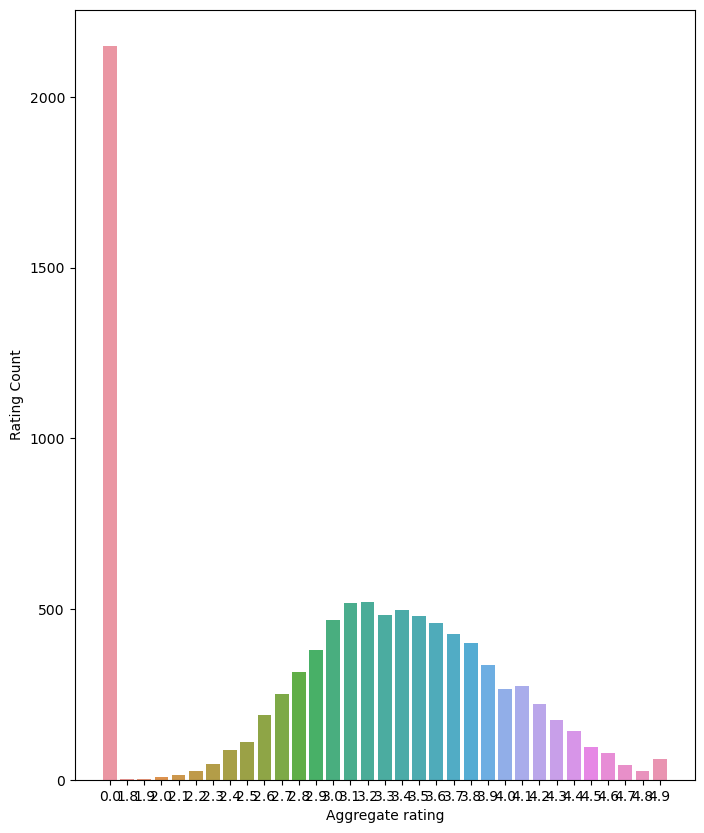

In [307]:
sns.barplot(x='Aggregate rating',y='Rating Count',data = ratings)
matplotlib.rcParams['figure.figsize'] = (12,6)
plt.plot()

[]

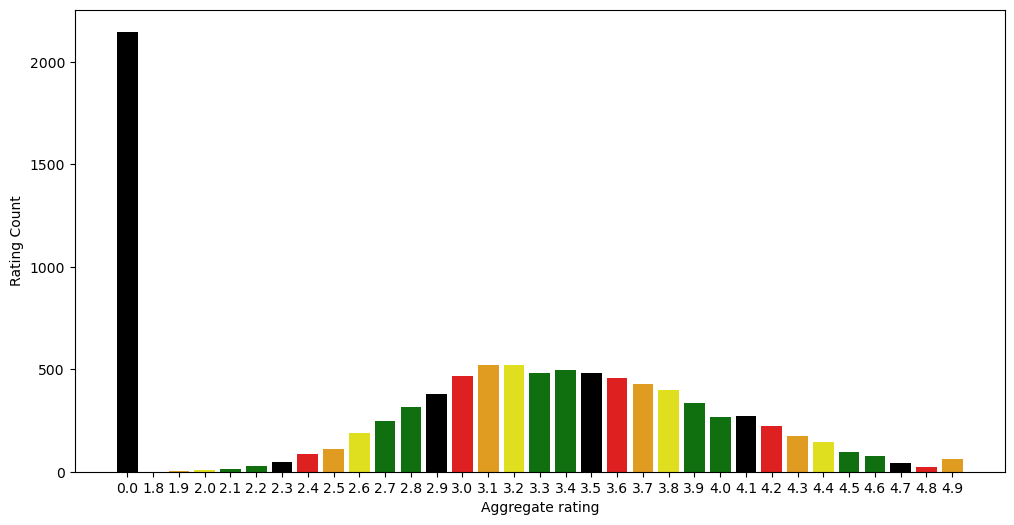

In [308]:
# WE CAN ADD COLOR BASE ON A COLUMNS USING HUE
#           sns.barplot(x='Aggregate rating',y='Rating Count',data = ratings, hue='Rating color')

# but the colors are not matching so we use PALLET to give our own colors

sns.barplot(x='Aggregate rating',y='Rating Count',data = ratings,palette=['black','red','orange','yellow','green','green'])
matplotlib.rcParams['figure.figsize'] = (12,6)
plt.plot()
# MAX NUMBER OF DATA ARE FOUND BTW 2.5 TO 4.5

<Axes: xlabel='Rating color', ylabel='count'>

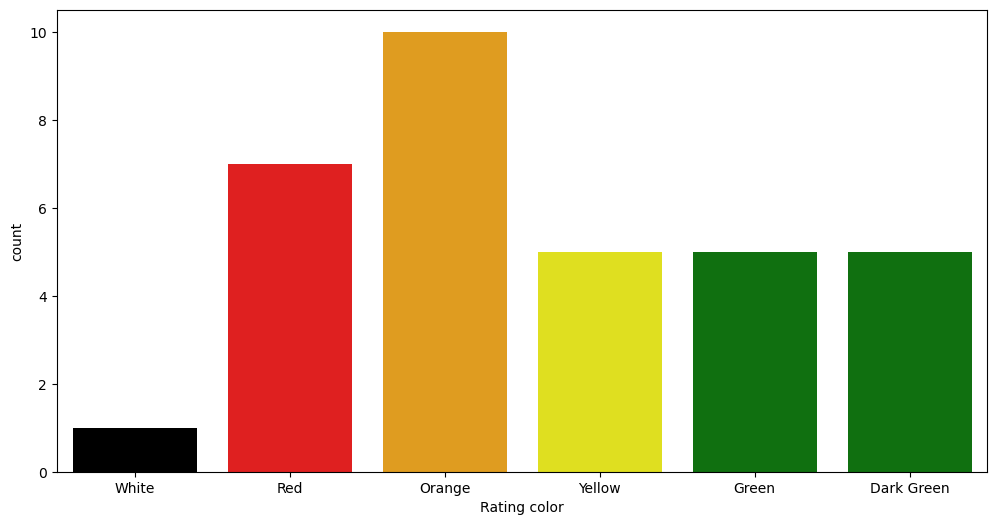

In [309]:
# COUNT PLOT FOR SAME BARGRAPH FOR CATEGORICAL VALUE
sns.countplot(x = 'Rating color',data=ratings, palette=['black','red','orange','yellow','green','green'])
# now we can see how frequently the data are appearing , not the COUNT NOTE NOTE NOTE NOTE NOTE
# THIS IS USED TO TELL HOW MANY TYPES THE DATA ARE OCCURING 

In [310]:
# matplotlib.rcParams['figure.figsize'] = (20,12)
# sns.barplot(x='Country',y='Aggregate rating',data = df,palette=['black','red','orange','yellow','green','green'])
# matplotlib.rcParams['figure.figsize'] = (12,6)
# plt.plot()

Finding all the country that has given 0 ratings

In [311]:
# These are the county given 0.0 Ratings
# NOTE NOTE NOTE see how you can use the group by by giving a condition and add a col to match with it 
df[df['Rating color'] == 'White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Find which curreny is used by this country

In [312]:
cc = df.groupby(['Country','Currency']).size().reset_index()
cc

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


Check if it has online delivery or not

In [313]:
cd = df.groupby(['Country','Has Online delivery']).size().reset_index()
cd
# From all these we can know where all the online delivery is avaliable

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [314]:
# Which country has online delivery
df.Country[df['Has Online delivery'] == 'Yes'].value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [315]:
# Create a pie chart for city distribution
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

PLotting a pie chart for city values

In [316]:
city_names = df.City.value_counts().index
city_values = df.City.value_counts().values

Top 10 cities of Zomato

[]

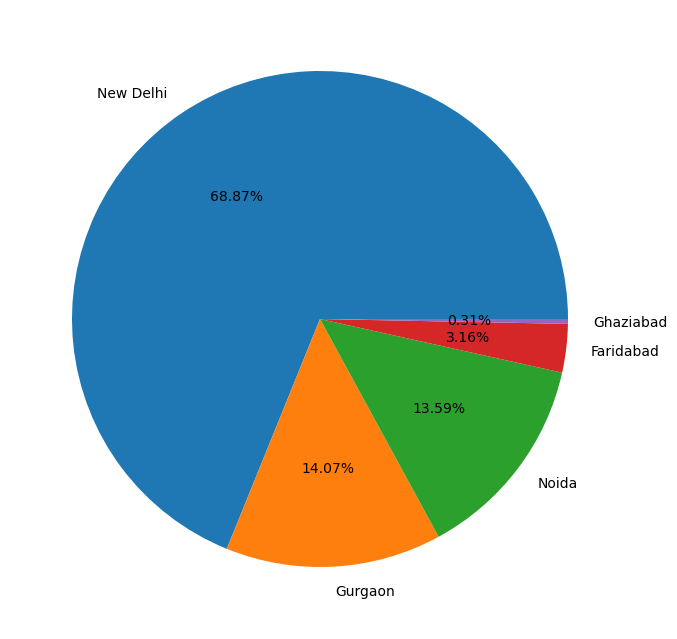

In [318]:
matplotlib.rcParams['figure.figsize'] = (8,10)
plt.pie(city_values[:5], labels=city_names[:5],autopct='%.2f%%')
plt.plot()

Find top 10 cousines

In [319]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [357]:
# The top 10 Cuisines
df['Cuisines'].value_counts().head(11)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Name: count, dtype: int64

In [368]:
# which cusines has the highest vote and where it is located and also which locality it is present in and the price range index 
df[df.Votes == df.Votes.max()].groupby(['Cuisines','City','Country','Locality Verbose','Price range']).size()

Cuisines                  City       Country  Locality Verbose        Price range
Italian, American, Pizza  Bangalore  India    Indiranagar, Bangalore  4              1
dtype: int64

In [359]:
# here we have which cusine has the highest vote
df[df['Votes'] == df.Votes.max()].groupby('Cuisines').size()

Cuisines
Italian, American, Pizza    1
dtype: int64

In [363]:
df['Locality Verbose'].value_counts()

Locality Verbose
Connaught Place, New Delhi                    122
Rajouri Garden, New Delhi                      99
Shahdara, New Delhi                            87
Defence Colony, New Delhi                      86
Pitampura, New Delhi                           85
                                             ... 
Ramada Gurgaon Central, Sector 44, Gurgaon      1
Sector 5, Gurgaon                               1
Sector 53, Gurgaon                              1
The Claremont, MG Road, Gurgaon                 1
Moda, ÛÁstanbul                                 1
Name: count, Length: 1265, dtype: int64